In [ ]:
#la historia deteccion de fraude, descripcion de varibles, reseña de Kaggle habalndo de PCA  fuente de datos , composicion de la data

# **Detección de fraude en tarjetas de crédito**

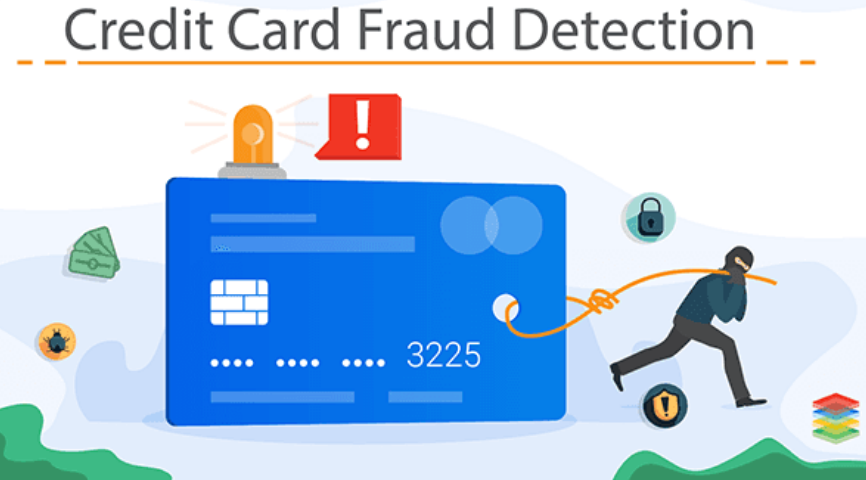

In [ ]:
#@title Detección de Fraude en Tarjetas de Crédito
from IPython.display import Image
Image("/content/drive/MyDrive/fraud detection credit card algoritmos  supervisado.PNG")

El fraude con tarjetas de crédito es un desafío importante para los propietarios de negocios, los emisores de tarjetas de pago y las empresas de 
servicios transaccionales, que causa cada año pérdidas financieras sustanciales y crecientes. Según el Informe Nilson de 2019, las pérdidas por fraude con tarjetas en todo el mundo han aumentado de 9,84 mil millones de dólares en 2011 a 27,85 mil millones de dólares en 2018, y se proyecta que alcancen más de 40 mil millones de dólares en 2027.







La integración de técnicas de Machine Learning (ML) en los sistemas de detección de fraudes con tarjetas de crédito ha mejorado enormemente su capacidad para detectar fraudes de manera más eficiente y ayudar a los intermediarios de procesamiento de pagos a identificar transacciones ilícitas. Aunque en los últimos años la cantidad de transacciones fraudulentas siguió aumentando, el porcentaje de pérdidas por fraude comenzó a disminuir en 2016, una tendencia inversa que se asocia con la creciente adopción de soluciones de ML. Además de ayudar a ahorrar dinero, la implementación de sistemas de detección de fraude basados en ML se está convirtiendo hoy en una obligación para las instituciones y empresas para ganarse la confianza de sus clientes. *texto en cursiva*



**Datos:**



**Fuente:** https://www.kaggle.com/mlg-ulb/creditcardfraud









El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.
Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284.807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172% de todas las transacciones.







Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales y más información de fondo sobre los datos. Las características V1, V2,… V28 son los componentes principales obtenidos con PCA, las únicas características que no se han transformado con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Importe' es el Importe de la transacción, esta función se puede utilizar para el aprendizaje dependiente de los costos por ejemplo. La característica 'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

Dada la relación de desequilibrio de clases, recomendamos medir la precisión utilizando el área bajo la curva de recuperación de precisión (AUPRC). La precisión de la matriz de confusión no es significativa para la clasificación desequilibrada

**Variables no anonimizadas:**



**Time**   Contiene los segundos transcurridos entre cada transacción.











**Amount** - Valor total de la transacción.














**Class-**Es el target, etiqueta dada a las transacciones, donde 0   representa una transacción normal y 1   refiere a una transacción fraudulenta.




https://towardsdatascience.com/detecting-credit-card-fraud-using-machine-learning-a3d83423d3b8

In [ ]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import seaborn as sb
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv') # carga de la data desde google drive 

In [ ]:
df # Composición de la data (variables del data set)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.77,0
284803,172787.0,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.79,0
284804,172788.0,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.88,0
284805,172788.0,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.00,0


In [ ]:
#shape cantidad de variables y registros del data set
# tardo en cargar la data por el peso
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [ ]:
#Toma una muestra aleatoria de 5 transacciones  de la data
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
115590,73926.0,-1.598,0.083,2.426,0.276,0.697,1.045,1.073,-0.764,1.631,0.766,-0.205,0.506,-0.618,-1.839,-2.961,-0.623,-0.771,-0.192,0.717,-0.283,-0.567,-0.604,-0.232,-0.514,0.085,-0.844,-1.526,-0.461,37.50,0
103491,68683.0,-2.648,-0.673,1.316,0.384,-1.440,1.229,-0.133,0.939,-0.179,-0.627,1.310,0.690,-0.278,0.321,1.072,-0.173,0.672,-0.111,0.731,-0.296,0.184,0.794,0.032,-0.158,-0.132,1.298,-0.280,-0.737,200.00,0
112842,72826.0,-10.043,-12.496,3.079,6.344,10.232,-6.615,-6.700,1.258,-0.224,0.941,-1.575,0.597,0.296,-0.113,-1.327,0.618,-0.341,0.125,-1.563,3.882,1.082,-1.132,3.033,0.249,0.988,-0.180,-0.516,0.353,396.13,0
235222,148305.0,2.071,-0.007,-1.113,0.376,-0.012,-1.113,0.229,-0.365,0.447,0.053,-0.756,0.755,0.777,0.130,-0.024,-0.094,-0.381,-0.906,0.197,-0.174,-0.291,-0.670,0.313,-0.092,-0.256,0.203,-0.067,-0.060,2.69,0
143789,85624.0,-0.510,0.815,1.541,1.269,0.012,0.259,0.431,0.232,-0.396,0.019,1.000,0.111,-1.756,0.520,-0.332,-1.014,0.533,-0.070,0.983,-0.127,0.074,0.318,-0.133,0.200,-0.275,-0.278,0.047,0.129,18.78,0


In [ ]:
#info resumen de los datos, cantidad  de valores no nulos en cada variable, que variables son tipo string y numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# numerical summary -> Sólo las variables no anonimizadas Time Amount 
pd.set_option('precision', 3) #  3 decimales de precisión
df.loc[:, ['Time', 'Amount']].describe()  # Filtra 2 variables y calcula estadisticas básicas como,   count, mean,std,min,percentil 25, ...max

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


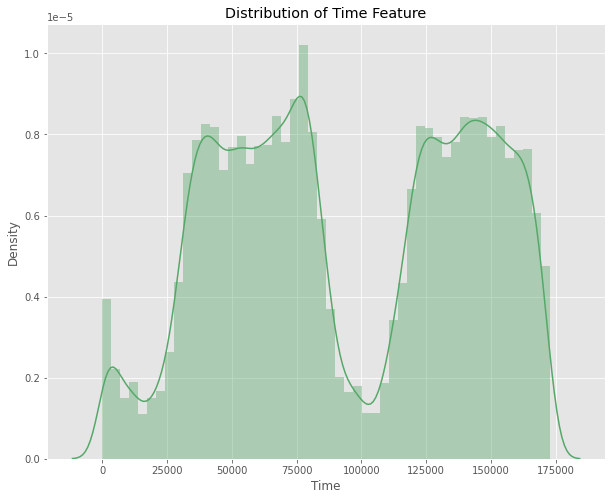

In [ ]:
#visualizations of time and amount
#Distribución de la variable Time

plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time,color="g")

 Este conjunto de datos incluye todas las transacciones registradas en el transcurso de dos días. A diferencia de la distribución del valor monetario de las transacciones, es bimodal. Esto indica que aproximadamente 28 horas después de la primera transacción hubo una caída significativa en el volumen de transacciones. Si bien no se proporciona la hora de la primera transacción, sería razonable suponer que la caída en el volumen ocurrió durante la noche.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


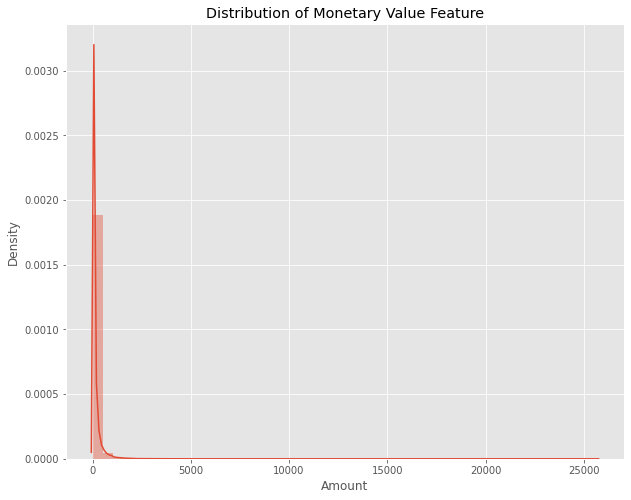

In [ ]:
#Distribución de la variable Amount

plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)




 El valor medio de todas las transacciones es USD 88,35, mientras que la transacción más grande registrada en este conjunto de datos asciende a USD 25,691. Por otro lado, la distribución del valor monetario de todas las transacciones está muy sesgada a la derecha. La gran mayoría de las transacciones son relativamente pequeñas y solo una pequeña fracción de las transacciones se acerca al máximo.


In [ ]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Podemos ver que de 284.807 muestras, solo hay 492 casos de fraude, lo que representa solo el 0.17 por ciento del total de muestras. Por lo tanto, podemos decir que los datos con los que estamos tratando son datos muy desequilibrados y deben manejarse con cuidado al modelar y evaluar el rendimiento de los modelos.


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

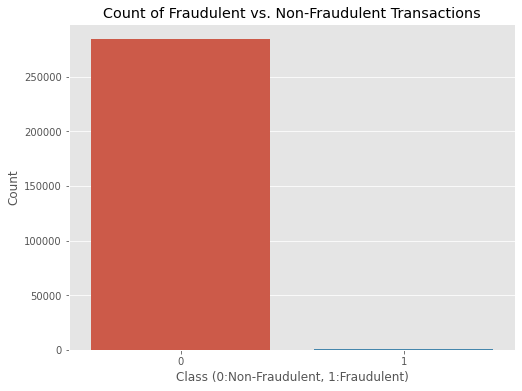

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts     )
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [ ]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,3.062e-02,-2.477e-01,1.243e-01,-6.590e-02,-9.876e-02,-1.835e-01,1.190e-02,-7.330e-02,9.044e-02,2.898e-02,-5.087e-02,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,7.434e-17,2.439e-16,2.422e-16,-2.115e-16,9.353e-16,-3.252e-16,6.309e-16,-5.012e-16,2.870e-16,1.818e-16,1.037e-16,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,-4.782e-16,9.469e-16,-6.588e-16,3.855e-16,-2.541e-16,2.831e-16,4.934e-17,-9.883e-16,2.637e-16,9.528e-17,-9.310e-16,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,6.289e-16,-5.502e-17,2.207e-16,-6.883e-16,4.271e-16,1.123e-16,1.183e-15,4.577e-17,5.428e-16,2.577e-16,-9.429e-16,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,6.055e-16,-2.084e-16,-5.658e-16,-1.506e-16,-8.522e-17,-1.508e-16,-6.939e-16,-4.398e-16,1.494e-16,-2.657e-16,-3.223e-16,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,-6.602e-16,7.343e-16,3.761e-16,-9.579e-16,-3.635e-16,-5.133e-16,-3.517e-16,1.426e-16,1.110e-15,-3.138e-16,2.076e-16,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,2.851e-16,4.866e-16,2.141e-16,-2.268e-16,3.453e-16,-6.368e-18,-2.478e-16,3.568e-16,2.811e-16,2.717e-16,1.899e-16,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,3.043e-17,-1.084e-15,1.510e-15,-9.892e-17,-1.729e-16,1.937e-17,2.894e-16,1.150e-15,-1.117e-16,-2.874e-16,1.744e-16,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,9.052e-17,1.955e-16,-6.266e-17,-2.383e-16,-1.131e-16,2.021e-16,5.027e-16,-3.509e-16,-4.094e-16,-5.340e-16,-1.096e-16,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,-2.772e-16,4.682e-16,-2.445e-15,-2.650e-16,2.343e-16,-1.588e-15,-3.252e-16,6.536e-16,1.204e-16,1.121e-16,-4.341e-16,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


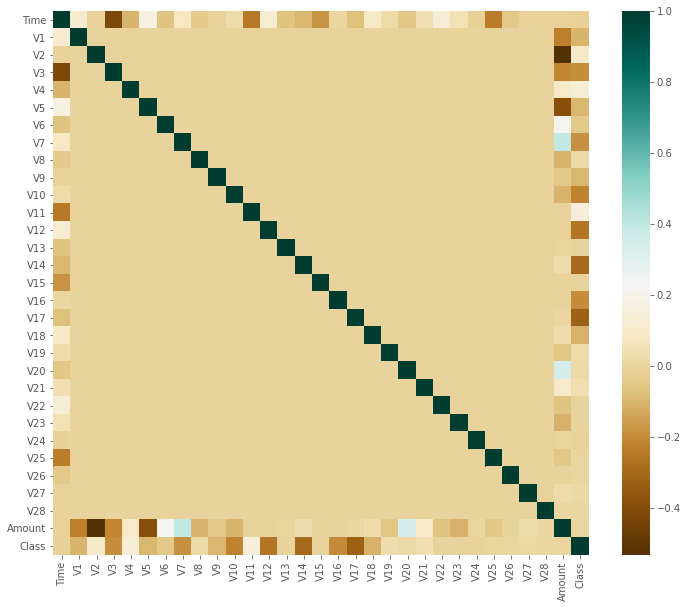

In [ ]:
# matrix de correlación

corr = df.corr()

# Draw the heatmap
plt.figure(figsize=(12,10))
#
sns.heatmap(corr,cmap='BrBG')





Como se  puede ver, algunos de los predictores parecen estar correlacionados con la variable  Class. No obstante, parece haber relativamente pocas correlaciones significativas para un número tan grande de variables. Probablemente esto se pueda atribuir a dos factores:






1.   Los datos se prepararon utilizando un PCA, por lo que nuestros predictores son componentes principales.



2. El enorme desequilibrio de clases podría distorsionar la importancia de ciertas correlaciones con respecto a nuestra variable class.










Por lo que se considera que no hay riesgo de multicolinealidad.

# **Verificación de valores atípicos en los valores de 'Cantidad':**

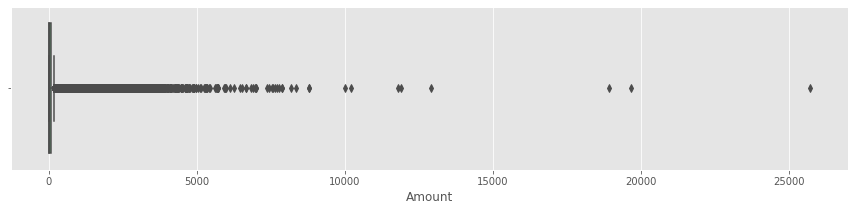

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.set_color_codes()
sns.boxplot(x='Amount', data=df,color="g")
plt.show()

##sns.set_color_codes()
#ax = sns.distplot(x, color="y")

Los diagramas de caja nos proporcionan una buena intuición de si debemos preocuparnos por los valores atípicos, ya que todas las transacciones fuera de 1,5 veces el IQR (rango intercuartil) generalmente se consideran valores atípicos. Como se puede notar, hay muchos valores atípicos en la variable Amount

# **Escalamiento de caracteristicas**

 Eliminar todas las transacciones fuera de 1,5 veces el IQR  (atípicas) disminuiría drásticamente el tamaño de los datos de entrenamiento, el cual  no es muy grande. Por lo tanto, se decide no eliminar los valores atípicos, y usar un escalador robusto, para las variables que aún no han sido escaladas (Time y Amount)
 . 

**Escalamiento de funciones **

https://medium.com/analytics-vidhya/credit-card-fraud-detection-with-machine-learning-fd2223c23648

Las características V1-V28 han sido **transformadas por PCA y ya escaladas **

(desde el dataset de kaggle viajan de esa forma). Mientras que la caracteriritica "Time" y "Amount" no lo tienen. Y considerando que se  analizará estas dos características con otros V1-V28, es mejor escalarlas antes de entrenar los modelos. El **Escalador estándar** no se recomienda ya que las caracteristicas de "Tiempo" y "Cantidad" no se distribuyen normalmente. Tampoco se recomienda el  **escalador Min-Max**   ya que hay valores atípicos notables en la caracteristica "Cantidad". El  **Escalador robust *texto en cursiva*o **  es robusto a valores atípicos: (xi – Q1 (x)) / (Q3 (x) –Q1 (x)) (Q1 y Q3 representan cuartiles del 25% y 75%). Por eso, elegimos **Robust Scaler** para escalar estas dos funciones.

In [ ]:
# Scale "Time" and "Amount"

from sklearn.preprocessing import StandardScaler, RobustScaler
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"

df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()


#print(df_scaled.shape)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0,1.783,-0.995
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0,-0.270,-0.995
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0,4.984,-0.995
3,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0,1.418,-0.995
4,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0,0.671,-0.995


**Dividing the dataset in train and test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train and test data
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)   # esta pndiente que expliques bien qporque estos parámetros

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((213605, 30), (71202, 30), (213605,), (71202,))

In [ ]:
y_train.value_counts(), y_test.value_counts()

(0    213236
 1       369
 Name: Class, dtype: int64, 0    71079
 1      123
 Name: Class, dtype: int64)

En la data de entrenamiento se tienen 213236 datos no fraudulentos, y 369 datos fraudulentos


Y en la data de test, se tienen 71079 datos no fraudulentos, y 123 datos fraudulentos



In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Datos desbalanceados**

In [ ]:
smote=SMOTE(random_state=42)
X_train, y_train=smote.fit_sample(X_train, y_train)
X_train.shape, y_train.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((426472, 30), (426472,))

1    213236
0    213236
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


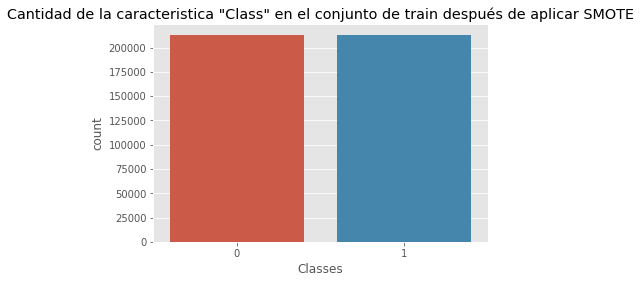

In [ ]:
# new class distribution
print(pd.Series(y_train).value_counts())
sns.countplot(y_train)
plt.xlabel("Classes")
plt.xticks(rotation=0)
plt.title("Cantidad de la caracteristica \"Class\" en el conjunto de train después de aplicar SMOTE")
plt.show()

Otro problema a abordar es el conjunto de datos altamente desequilibrado. Hay varias formas de evaluar y solucionar el problema del desequilibrio. La técnica sintética de **sobremuestreo de minorías (SMOTE)** es uno de los métodos de sobremuestreo que abordan este problema, consiste en  crea observaciones sintéticas de la clase minoritaria (en este caso, transacciones fraudulentas)

In [ ]:
pip install catboost # instalando libreria de catboost

     |████████████████████████████████| 67.4 MB 30 kB/s 


In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import Pool, CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.metrics import auc,roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
n=5

classifiers = [
    LogisticRegression(max_iter=2000),
 KNeighborsClassifier(n),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
   AdaBoostClassifier(),
    CatBoostClassifier(iterations=100,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 2018,
                             od_type='Iter',
                             metric_period = 1,
                             od_wait=100),

   LGBMClassifier(n_estimators = 200, 
                         max_depth=10,
                         learning_rate = 0.1
                         )               
      

    ]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     71079
           1       0.06      0.90      0.11       123

    accuracy                           0.97     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.97      0.99     71202

------------------------------
Confusion matrix:
 [[69237  1842]
 [   12   111]]
ROC AUC Score: 0.9782965066809323
------------------------------


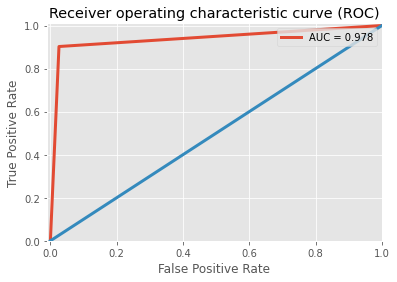

findfont: Font family ['.SF Compact Display'] not found. Falling back to DejaVu Sans.


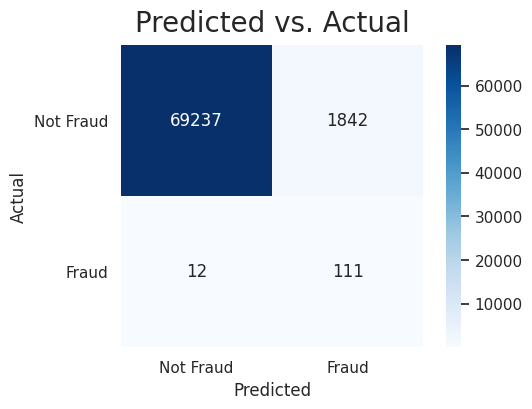

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.43      0.89      0.58       123

    accuracy                           1.00     71202
   macro avg       0.72      0.95      0.79     71202
weighted avg       1.00      1.00      1.00     71202

------------------------------
Confusion matrix:
 [[70935   144]
 [   13   110]]
ROC AUC Score: 0.9466144220383663
------------------------------


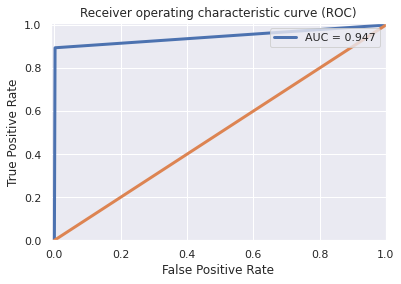

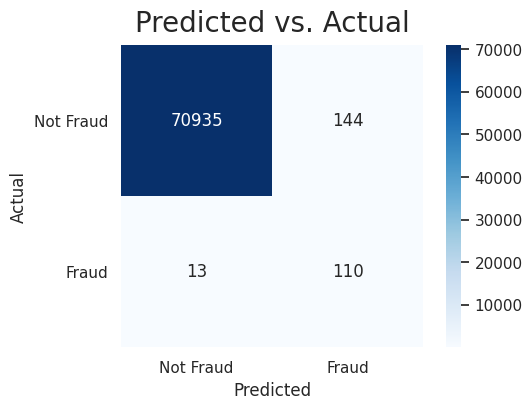

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.41      0.80      0.54       123

    accuracy                           1.00     71202
   macro avg       0.71      0.90      0.77     71202
weighted avg       1.00      1.00      1.00     71202

------------------------------
Confusion matrix:
 [[70939   140]
 [   25    98]]
ROC AUC Score: 0.8973891640321882
------------------------------


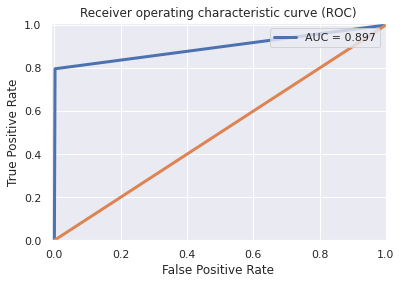

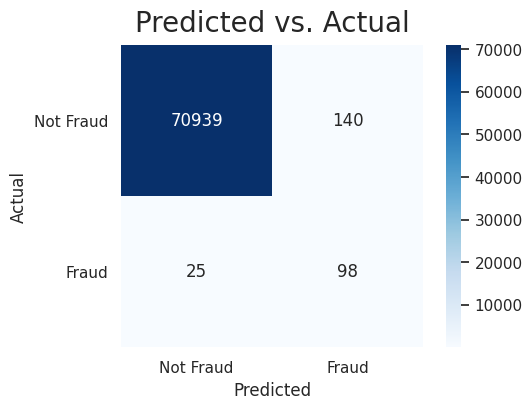

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.91      0.84      0.87       123

    accuracy                           1.00     71202
   macro avg       0.96      0.92      0.94     71202
weighted avg       1.00      1.00      1.00     71202

------------------------------
Confusion matrix:
 [[71069    10]
 [   20   103]]
ROC AUC Score: 0.9647

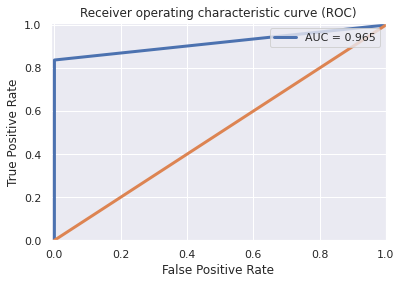

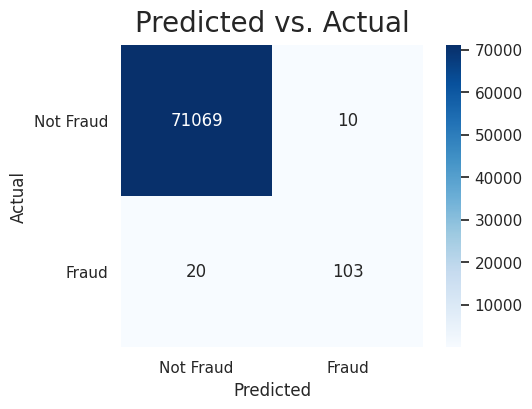

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.07      0.89      0.13       123

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.56     71202
weighted avg       1.00      0.98      0.99     71202

------------------------------
Confusion matrix:
 [[69679  1400]
 [   14   109]]
ROC AUC Score: 0.9738816319915193
------------------------------


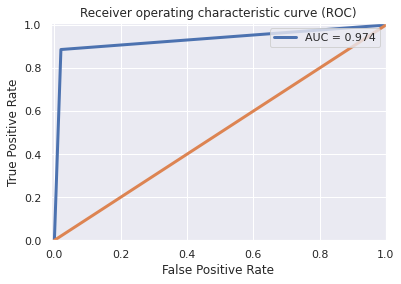

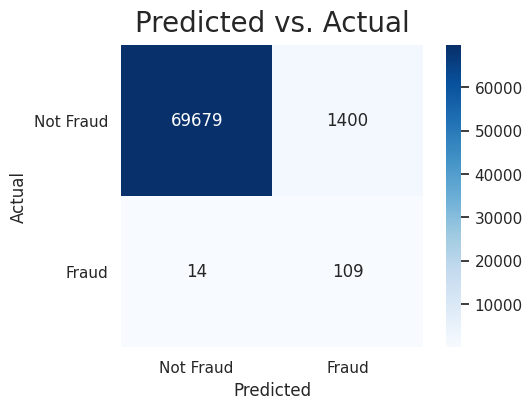

Learning rate set to 0.5
0:	total: 1.08s	remaining: 1m 47s
1:	total: 2.06s	remaining: 1m 40s
2:	total: 2.91s	remaining: 1m 34s
3:	total: 3.87s	remaining: 1m 32s
4:	total: 4.81s	remaining: 1m 31s
5:	total: 5.81s	remaining: 1m 30s
6:	total: 6.73s	remaining: 1m 29s
7:	total: 7.62s	remaining: 1m 27s
8:	total: 8.52s	remaining: 1m 26s
9:	total: 9.45s	remaining: 1m 25s
10:	total: 10.3s	remaining: 1m 23s
11:	total: 11.1s	remaining: 1m 21s
12:	total: 12s	remaining: 1m 20s
13:	total: 12.9s	remaining: 1m 19s
14:	total: 13.8s	remaining: 1m 18s
15:	total: 14.7s	remaining: 1m 16s
16:	total: 15.5s	remaining: 1m 15s
17:	total: 16.4s	remaining: 1m 14s
18:	total: 17.3s	remaining: 1m 13s
19:	total: 18.1s	remaining: 1m 12s
20:	total: 18.9s	remaining: 1m 11s
21:	total: 19.8s	remaining: 1m 10s
22:	total: 20.7s	remaining: 1m 9s
23:	total: 21.6s	remaining: 1m 8s
24:	total: 22.5s	remaining: 1m 7s
25:	total: 23.3s	remaining: 1m 6s
26:	total: 23.9s	remaining: 1m 4s
27:	total: 24.9s	remaining: 1m 4s
28:	total: 25

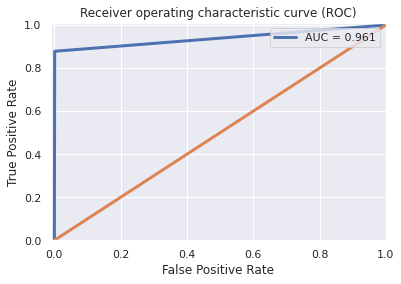

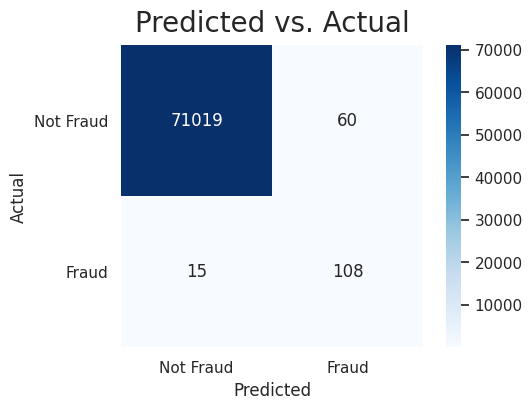

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.51      0.83      0.63       123

    accuracy                           1.00     71202
   macro avg       0.75      0.91      0.82     71202
weighted avg       1.00      1.00      1.00     71202

------------------------------
Confusion matrix:
 [[70981    98]
 [   21   102]]
ROC AUC Score: 0.9267204920392595
------------------------------


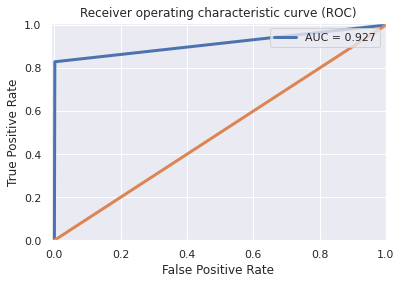

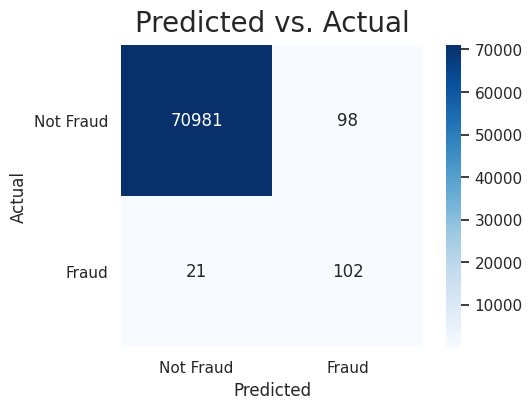

In [ ]:
for classifier in classifiers:
    pipe = Pipeline(steps=[('SMOTE', smote),('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    # Obtain model predictions
    y_predicted = classifier.predict(X_test)
    # Print the classifcation report and confusion matrix
    print('Classification report:\n', classification_report(y_test, y_predicted))
    print('-'*30)
    print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))  
    # Create true and false positive rates
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

    # Calculate Area Under the Receiver Operating Characteristic Curve 
    probs = classifier.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, probs[:, 1])
    print('ROC AUC Score:',roc_auc)
    print('-'*30)
    # Obtain precision and recall 
    precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

    # Calculate average precision 
    average_precision = average_precision_score(y_test, y_predicted)
    #ROC curve plot 
    plt.plot(false_positive_rate, true_positive_rate, linewidth=3, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1],linewidth=3)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    

   #Confusion matrix heatmap

    # Predict class 1 if probability of being in class 1 is greater than threshold
    fraud_confusion = confusion_matrix(y_test, y_predicted)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

**Matriz de confusión**

Observando la matriz de confusión el **modelo de regresión logística, captura 109 de 123 casos de fraude** en el conjunto de datos de test y 1774 transacciones se marcaron por error como fraudulentas, cuando en realidad no lo son.Por otro ldo, se observa que este modelo es que tiene menor número de falsos negativos, con apenas 14, es decir, **que 14 transacciones fueron clasificadas como no fraudulentas cuando en realidad si eran fraudulentas.**

Observando la matriz de confusión el **modelo knn, captura 104 de 123 casos de fraude** en el conjunto de datos de test y 124 transacciones se marcaron por error como fraudulentas, cuando en realidad no lo son.Por lo que la cantidad de falsos positivos disminuyo con respecto al modelo de RL.

Observando la matriz de confusión el **modelo de árbol de decisión, captura 97 de 123 casos de fraude** en el conjunto de datos de test y 147 transacciones se marcaron por error como fraudulentas, cuando en realidad no lo son.

Observando la matriz de confusión el **modelo de Random Forest , captura 100 de 123 casos de fraude** en el conjunto de datos de test y 9 transacciones se marcaron por error como fraudulentas, cuando en realidad no lo son.

Observando la matriz de confusión el **modelo de Adaboost**, captura 106 de 123 casos de fraude en el conjunto de datos de test y 1227 transacciones se marcaron por error como fraudulentas, cuando en realidad no lo son.

Observando la matriz de confusión el **modelo de Catboost, captura 102 de 123 casos de fraude** en el conjunto de datos de test y 57 transacciones se marcaron por error como fraudulentas, cuando en realidad no lo son.

Observando la matriz de confusión el **modelo de LGBM, captura 100 de 123 casos de fraude** en el conjunto de datos de test y 25 transacciones se marcaron por error como fraudulentas, cuando en realidad no lo son.

**Curva ROC -AUC**

Los modelos que presentan mayor AUC son: 


**Modelo de Regresión Logistica** con AUC=0.977



El **modelo Adaboost** con AUC=0.964

**Referencias:**

Performance Evaluation of Machine Learning Algorithms for Credit Card Fraud Detection.  https://ieeexplore.ieee.org/document/8776925




Credit Card Fraud Detection using Machine Learning Algorithms. 
https://www.sciencedirect.com/science/article/pii/S187705092030065X/pdf?md5=5d8441a61d34c23f8f24813729334508&pid=1-s2.0-S187705092030065X-main.pdf




Application of Machine Learning Techniques  in Credit Card Fraud Detection 
https://digitalscholarship.unlv.edu/cgi/viewcontent.cgi?article=4457&context=thesesdissertations